In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Data Collection

In [2]:
data=pd.read_csv('t20_dataset.csv')

In [3]:
data.shape

(38477, 10)

In [4]:
data.head()

,Unnamed: 0,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,31184,West Indies,Bangladesh,Mirpur,79,45,8,6.320000,25.0,132
1,28866,Pakistan,South Africa,Abu Dhabi,96,19,2,5.702970,13.0,119
2,30208,South Africa,New Zealand,Auckland,125,40,6,9.375000,59.0,165
3,8641,Pakistan,Australia,Dubai,72,62,10,7.448276,31.0,150
4,48889,Afghanistan,West Indies,Nagpur,53,54,6,4.818182,20.0,123


In [106]:
#crr---Current Run Rate
#last_five---Last five over score
#run_x---Projected score

In [5]:
data.describe()

,Unnamed: 0,current_score,balls_left,wickets_left,crr,last_five,runs_x
count,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000
mean,25251.898693,94.122541,45.881514,6.737428,7.567335,38.523248,160.132001
std,14574.554054,41.626571,26.548397,2.031181,1.719908,11.808327,32.052503
min,29.000000,12.000000,0.000000,0.000000,2.270270,10.000000,72.000000
25%,12635.000000,61.000000,23.000000,5.000000,6.371681,30.000000,139.000000
50%,25257.000000,89.000000,46.000000,7.000000,7.500000,38.000000,159.000000
75%,37894.000000,123.000000,69.000000,8.000000,8.625000,46.000000,182.000000
max,50500.000000,263.000000,98.000000,10.000000,16.600000,89.000000,263.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38477 entries, 0 to 38476
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     38477 non-null  int64  
 1   batting_team   38477 non-null  object 
 2   bowling_team   38477 non-null  object 
 3   city           38477 non-null  object 
 4   current_score  38477 non-null  int64  
 5   balls_left     38477 non-null  int64  
 6   wickets_left   38477 non-null  int64  
 7   crr            38477 non-null  float64
 8   last_five      38477 non-null  float64
 9   runs_x         38477 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 2.9+ MB


In [7]:
data.isna().sum()

Unnamed: 0       0
batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [8]:
data.columns

Index(['Unnamed: 0', 'batting_team', 'bowling_team', 'city', 'current_score',
       'balls_left', 'wickets_left', 'crr', 'last_five', 'runs_x'],
      dtype='object')

In [9]:
data.set_index(['Unnamed: 0'],inplace=True)

In [10]:
data.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
Unnamed: 0,,,,,,,,,
31184,West Indies,Bangladesh,Mirpur,79,45,8,6.320000,25.0,132
28866,Pakistan,South Africa,Abu Dhabi,96,19,2,5.702970,13.0,119
30208,South Africa,New Zealand,Auckland,125,40,6,9.375000,59.0,165
8641,Pakistan,Australia,Dubai,72,62,10,7.448276,31.0,150
48889,Afghanistan,West Indies,Nagpur,53,54,6,4.818182,20.0,123


# 2.Pre-processing

a)Outlier detection and Handling

Text(0.5, 1.0, 'Boxplot of current score')

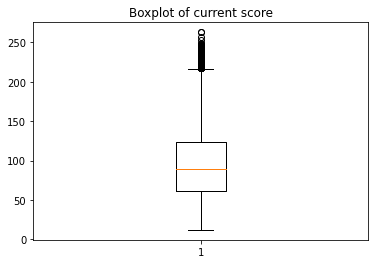

In [11]:
plt.boxplot(data['current_score'])
plt.title('Boxplot of current score')

In [83]:
#no outlier detected

Text(0.5, 1.0, 'Boxplot of balls left')

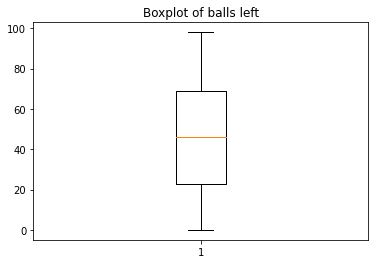

In [12]:
plt.boxplot(data['balls_left'])
plt.title('Boxplot of balls left')

In [84]:
#No outlier detected

Text(0.5, 1.0, 'Boxplot of wickets left')

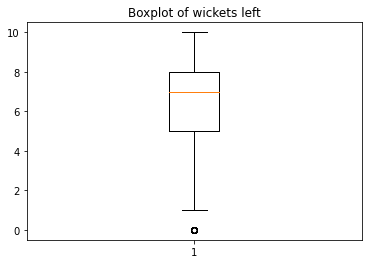

In [13]:
plt.boxplot(data['wickets_left'])
plt.title('Boxplot of wickets left')

In [87]:
#outlier in wickets left column is detected using box plot

Text(0.5, 1.0, 'Fequency graph of wickets left')

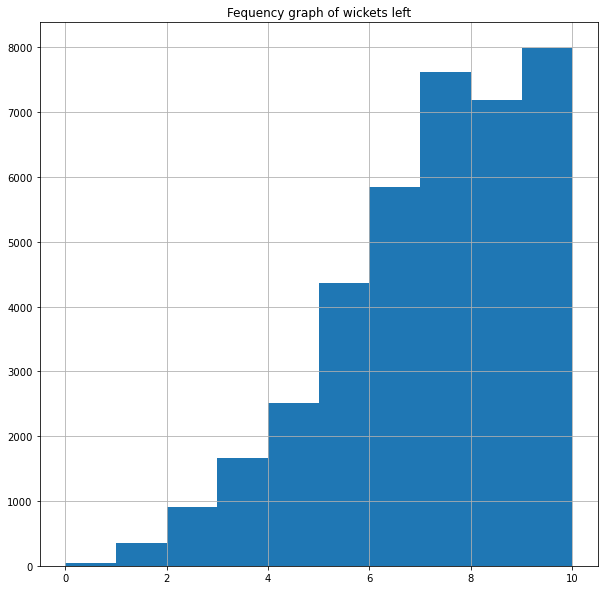

In [14]:
freq_graph=data['wickets_left']
freq_graph.hist(figsize=(10,10))
plt.title('Fequency graph of wickets left')

In [86]:
#frequency graph of wickets left is skewed hence replacing outlier with median value of column.

In [16]:
Q1=np.percentile(data['wickets_left'],25,interpolation='midpoint')
Q2=np.percentile(data['wickets_left'],50,interpolation='midpoint')
Q3=np.percentile(data['wickets_left'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=data[(data['wickets_left']<low_lim)|(data['wickets_left']>up_lim)].index
data.loc[list(out_ind),'wickets_left']=data['wickets_left'].median()

Text(0.5, 1.0, 'Boxplot of wickets left')

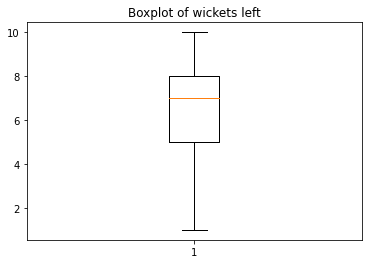

In [17]:
plt.boxplot(data['wickets_left'])
plt.title('Boxplot of wickets left')

Text(0.5, 1.0, 'Boxplot of crr')

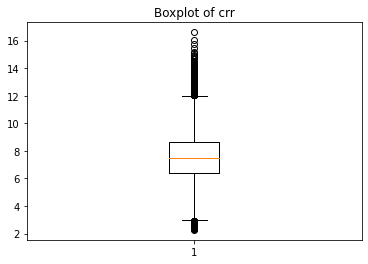

In [18]:
plt.boxplot(data['crr'])
plt.title('Boxplot of crr')

In [88]:
#outlier is dtected in box plot of crr column

Text(0.5, 1.0, 'Fequency graph of crr')

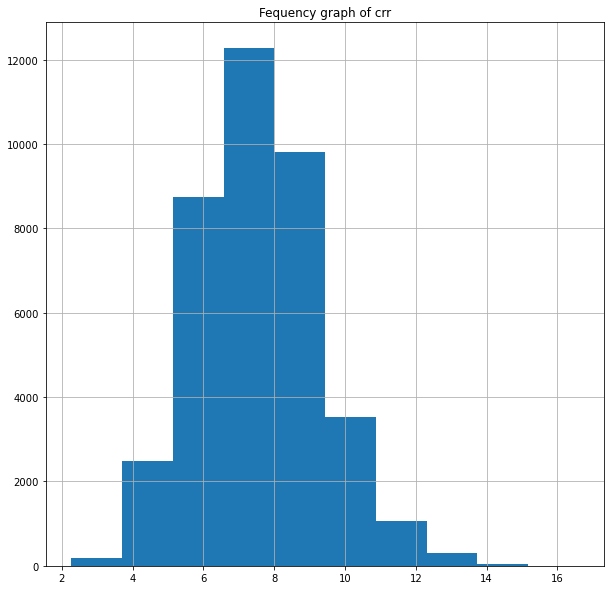

In [19]:
freq_graph=data['crr']
freq_graph.hist(figsize=(10,10))
plt.title('Fequency graph of crr')

In [89]:
#the frequency graph of crr is not skewed hence replacing outlier with mean value of column

In [21]:
Q1=np.percentile(data['crr'],25,interpolation='midpoint')
Q2=np.percentile(data['crr'],50,interpolation='midpoint')
Q3=np.percentile(data['crr'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=data[(data['crr']<low_lim)|(data['crr']>up_lim)].index
data.loc[list(out_ind),'crr']=data['crr'].mean()

Text(0.5, 1.0, 'Boxplot of crr')

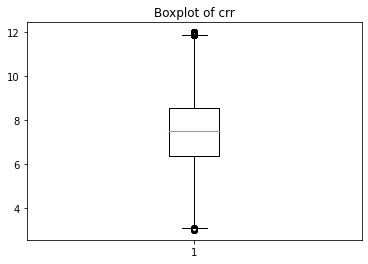

In [22]:
plt.boxplot(data['crr'])
plt.title('Boxplot of crr')

Text(0.5, 1.0, 'Boxplot of last_five')

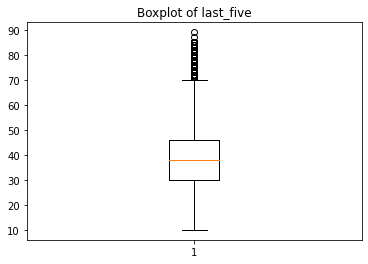

In [23]:
plt.boxplot(data['last_five'])
plt.title('Boxplot of last_five')

In [90]:
#no outlier is detected in last five column

Text(0.5, 1.0, 'Boxplot of runs_x')

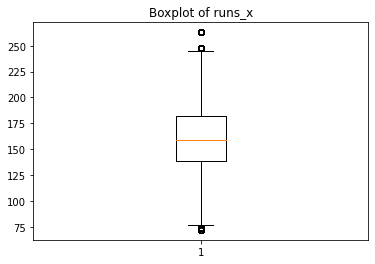

In [24]:
plt.boxplot(data['runs_x'])
plt.title('Boxplot of runs_x')

In [ ]:
#outlier is detected in boxplot of run_x column

Text(0.5, 1.0, 'Fequency graph of runs_x')

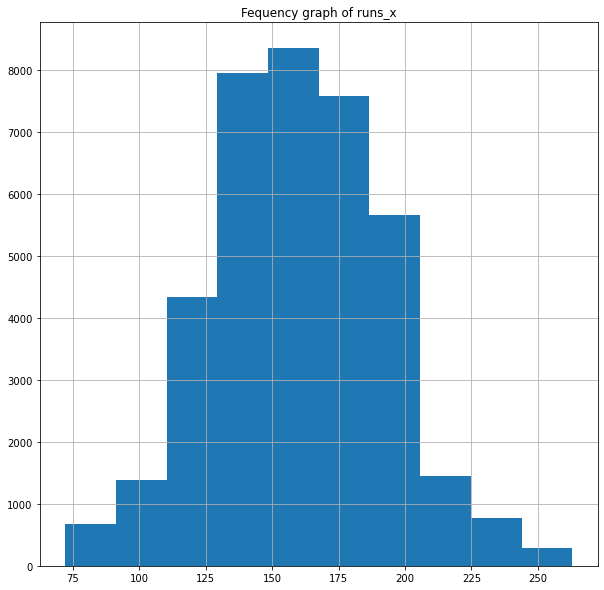

In [25]:
freq_graph=data['runs_x']
freq_graph.hist(figsize=(10,10))
plt.title('Fequency graph of runs_x')

In [91]:
#frequency graph of run_x is not skewed hence replacing outliers with mean value of the column

In [27]:
Q1=np.percentile(data['runs_x'],25,interpolation='midpoint')
Q2=np.percentile(data['runs_x'],50,interpolation='midpoint')
Q3=np.percentile(data['runs_x'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=data[(data['runs_x']<low_lim)|(data['runs_x']>up_lim)].index
data.loc[list(out_ind),'runs_x']=data['runs_x'].mean()

Text(0.5, 1.0, 'Boxplot of runs_x')

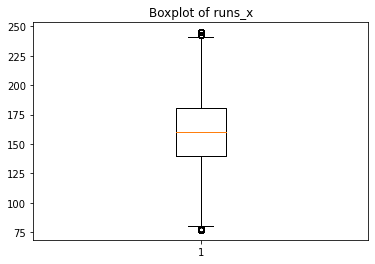

In [28]:
plt.boxplot(data['runs_x'])
plt.title('Boxplot of runs_x')

b)Encoding

In [29]:
data['batting_team'].nunique()

10

In [30]:
data['bowling_team'].nunique()

10

In [31]:
data['city'].value_counts()

Colombo            3129
Mirpur             2608
Johannesburg       2548
Dubai              2273
Auckland           1923
Cape Town          1818
London             1611
Pallekele          1573
Barbados           1557
Sydney             1202
Melbourne          1197
Durban             1143
St Lucia           1139
Wellington         1031
Lauderhill          948
Hamilton            929
Centurion           899
Manchester          854
Abu Dhabi           838
Mumbai              763
Nottingham          759
Southampton         755
Mount Maunganui     690
Chittagong          665
Kolkata             641
Lahore              574
Delhi               565
Nagpur              561
Chandigarh          482
Adelaide            478
Bangalore           475
Cardiff             470
Christchurch        469
Trinidad            466
St Kitts            444
Name: city, dtype: int64

In [92]:
#one hot encoding of batting team and bowling team columns

In [32]:
data=pd.get_dummies(data,columns=['batting_team', 'bowling_team'])

In [33]:
data.head()

,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31184,Mirpur,79,45,8,6.320000,25.0,132.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28866,Abu Dhabi,96,19,2,5.702970,13.0,119.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30208,Auckland,125,40,6,9.375000,59.0,165.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8641,Dubai,72,62,10,7.448276,31.0,150.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48889,Nagpur,53,54,6,4.818182,20.0,123.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
#label encoding of city column

In [34]:
from sklearn.preprocessing import LabelEncoder
lab_ec=LabelEncoder()
a=['city']
for i in np.arange(len(a)):
    data[a[i]]=lab_ec.fit_transform(data[a[i]])

In [35]:
data.head()

,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31184,23,79,45,8,6.320000,25.0,132.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28866,0,96,19,2,5.702970,13.0,119.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30208,2,125,40,6,9.375000,59.0,165.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8641,13,72,62,10,7.448276,31.0,150.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48889,26,53,54,6,4.818182,20.0,123.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


c)Standardization

In [94]:
#splitting the data

In [36]:
x=data.drop(['runs_x'],axis=1)
y=data['runs_x']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [38]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,...,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04,3.847700e+04
mean,5.270912e-16,3.591194e-17,1.026055e-17,-5.859336e-16,2.394942e-16,9.782511e-17,-4.680851e-16,-3.742938e-16,2.103056e-15,9.447413e-16,...,1.438051e-15,-9.871339e-16,4.927028e-16,-1.266771e-15,-2.656909e-16,5.624174e-16,1.076265e-15,-9.473872e-16,3.761433e-16,8.915659e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.737424e+00,-1.972865e+00,-1.728244e+00,-2.846614e+00,-2.818076e+00,-2.415551e+00,-1.202000e-01,-3.461496e-01,-2.322978e-01,-3.201450e-01,...,-1.193069e-01,-3.781609e-01,-2.840655e-01,-3.992052e-01,-3.517729e-01,-3.453959e-01,-3.901448e-01,-3.365152e-01,-3.331552e-01,-3.301622e-01
25%,-6.864009e-01,-7.957170e-01,-8.618905e-01,-8.647864e-01,-7.070300e-01,-7.218091e-01,-1.202000e-01,-3.461496e-01,-2.322978e-01,-3.201450e-01,...,-1.193069e-01,-3.781609e-01,-2.840655e-01,-3.992052e-01,-3.517729e-01,-3.453959e-01,-3.901448e-01,-3.365152e-01,-3.331552e-01,-3.301622e-01
50%,-5.578672e-02,-1.230610e-01,4.463091e-03,1.261273e-01,-6.636339e-03,-4.431233e-02,-1.202000e-01,-3.461496e-01,-2.322978e-01,-3.201450e-01,...,-1.193069e-01,-3.781609e-01,-2.840655e-01,-3.992052e-01,-3.517729e-01,-3.453959e-01,-3.901448e-01,-3.365152e-01,-3.331552e-01,-3.301622e-01
75%,6.799298e-01,6.937356e-01,8.708167e-01,6.215841e-01,6.627539e-01,6.331845e-01,-1.202000e-01,-3.461496e-01,-2.322978e-01,-3.201450e-01,...,-1.193069e-01,-3.781609e-01,-2.840655e-01,-3.992052e-01,-3.517729e-01,-3.453959e-01,-3.901448e-01,-3.365152e-01,-3.331552e-01,-3.301622e-01
max,1.836056e+00,4.057016e+00,1.963176e+00,1.612498e+00,2.804803e+00,4.274730e+00,8.319465e+00,2.888924e+00,4.304820e+00,3.123584e+00,...,8.381748e+00,2.644377e+00,3.520315e+00,2.504977e+00,2.842743e+00,2.895228e+00,2.563151e+00,2.971634e+00,3.001604e+00,3.028815e+00


# 3.Exploratory Data Analysis

a)Univariate analysis

In [95]:
#Frequency graph of current score

Text(0.5, 1.0, 'Frequency graph of current score')

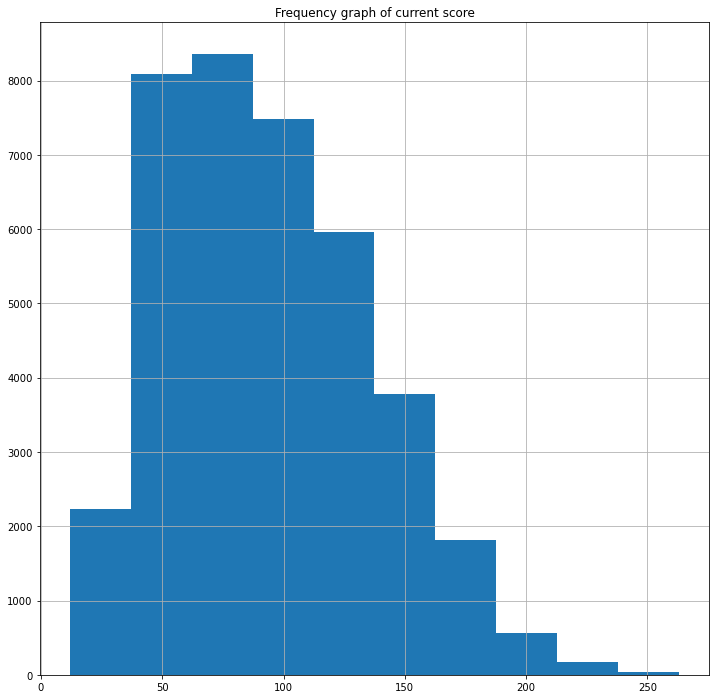

In [39]:
freq_cs=data['current_score']
freq_cs.hist(figsize=(12,12))
plt.title('Frequency graph of current score')

In [96]:
#Box plot of Balls left

Text(0.5, 0, 'Balls left')

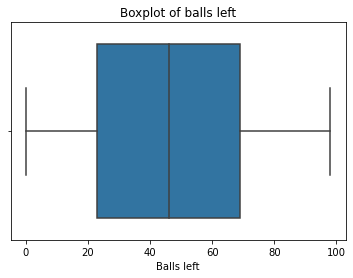

In [40]:
sns.boxplot(data['balls_left'])
plt.title('Boxplot of balls left')
plt.xlabel('Balls left')

In [97]:
#Rug plot of last five

Text(0.5, 1.0, 'Rug plot of last five')

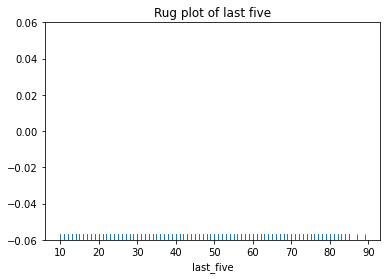

In [41]:
sns.rugplot(data['last_five'])
plt.title('Rug plot of last five')

In [98]:
#Distribution plot of Wickets left

Text(0.5, 0, 'Wickets left')

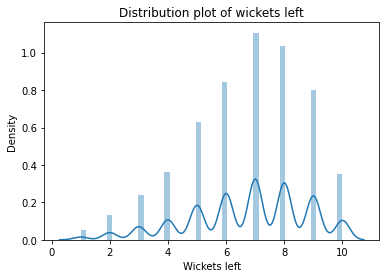

In [42]:
sns.distplot(data['wickets_left'])
plt.title('Distribution plot of wickets left')
plt.xlabel('Wickets left')

b)Bivariate Analysis

In [99]:
#Scatter plot of balls left vs wickets left

Text(0, 0.5, 'Balls left')

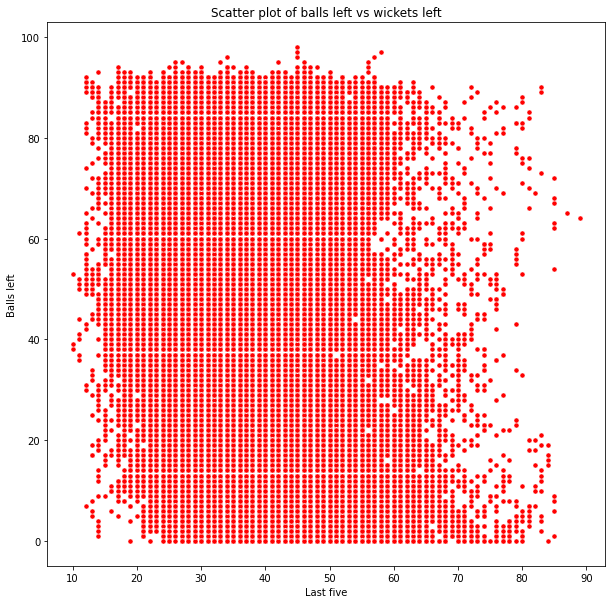

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data['last_five'],data['balls_left'],color='red',s=25)
plt.title('Scatter plot of balls left vs wickets left')
plt.xlabel('Last five')
plt.ylabel('Balls left')

In [100]:
#Pair plots of current score, balls left, wickets left, crr and last five

Text(0.5, 1.0, 'Pair plots of Current score, Balls left, Wickets left, crr, Last five')

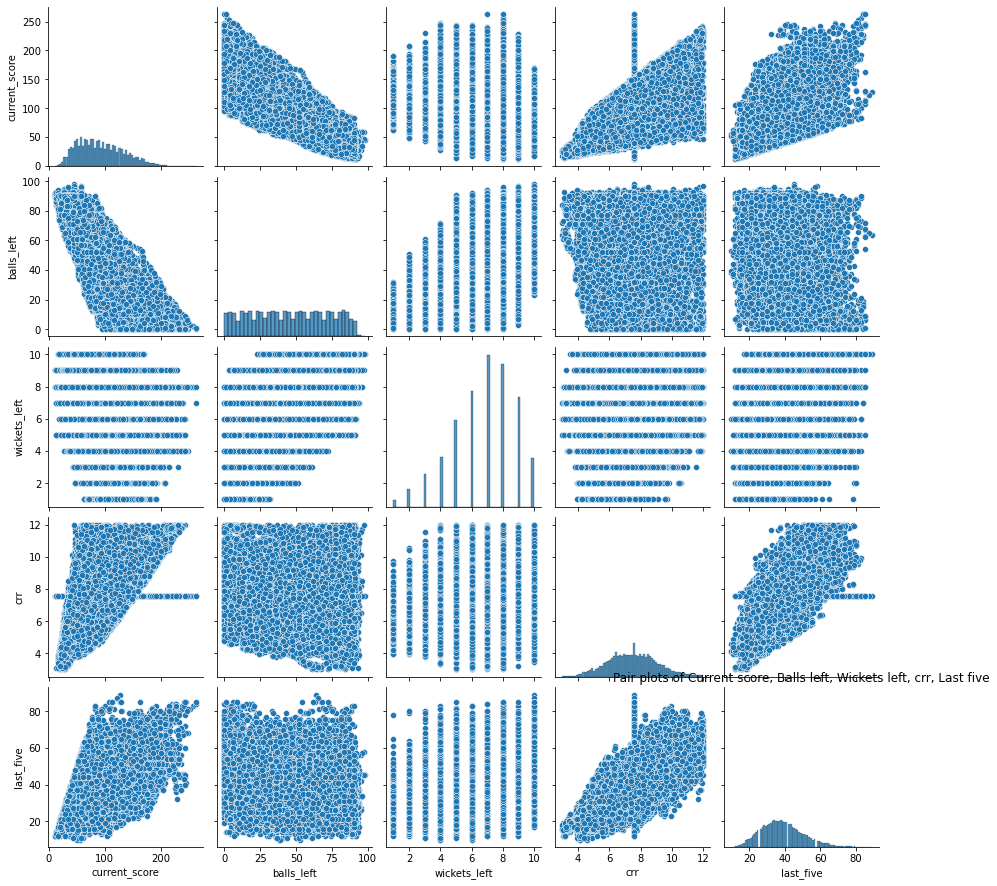

In [46]:
sns.pairplot(data[['current_score','balls_left','wickets_left','crr','last_five']]

In [ ]:
#Hexagonal Joint Plot Of wickets left vs balls left

Text(0.5, 1.0, 'Hexagonal plot of wickets left vs balls left')

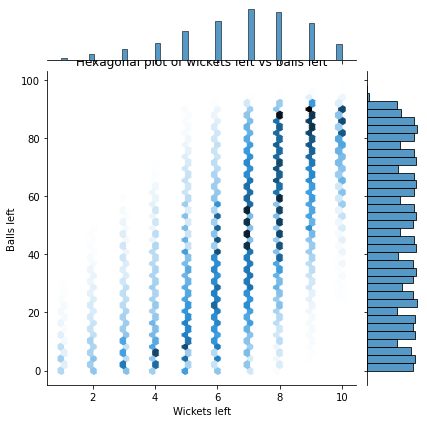

In [105]:
sns.jointplot(data['wickets_left'],data['balls_left'],kind='hex')
plt.xlabel('Wickets left')
plt.ylabel('Balls left')
plt.title('Hexagonal plot of wickets left vs balls left')

# 4.Modelling

Training the data


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


a)Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 351.5306842521573
R squared value: 0.620680753251349


b)Random Forest Regression Model

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 28.577636550217377
R squared value: 0.9691632962478193


c) Decision Tree Regression Model

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 64.28107363703714
R squared value: 0.9306374961717275


d)Support Vector Machines Model

In [69]:
from sklearn.svm import SVR
svm_model=SVR(kernel='rbf')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 261.11663240486945
R squared value: 0.7182420518195443


# 5.Model Fine Tuning

a) Fining tuning of hyper params of Random Forest Regression Model

In [71]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
rfr_model=RandomForestRegressor(n_estimators=500,random_state=42)
rfr_model.fit(x_train,y_train)
y_pred=rfr_model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 27.861466931329254
R squared value: 0.9699360792012016


b) Fine Tuning of hyper params of Decison Tree Regression Model

In [78]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [81]:
dtr_model=DecisionTreeRegressor(max_depth=50,random_state=42)
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value:',r2_score(y_test,y_pred))

MSE is: 63.95681552970033
R squared value: 0.9309873869395529
